In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


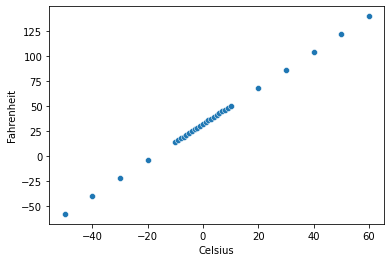

In [ ]:
sb.scatterplot(x=df['Celsius'], y=df['Fahrenheit'])

In [ ]:
X_train = df['Celsius']
Y_train = df['Fahrenheit']

In [ ]:
X_train.shape, Y_train.shape

((30,), (30,))

In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, Y_train, epochs=150)

Epoch 1/150
1/1 [==============================] - 0s 272ms/step - loss: 3677.7368
Epoch 2/150
1/1 [==============================] - 0s 3ms/step - loss: 2608.8945
Epoch 3/150
1/1 [==============================] - 0s 5ms/step - loss: 1804.4716
Epoch 4/150
1/1 [==============================] - 0s 3ms/step - loss: 1260.6702
Epoch 5/150
1/1 [==============================] - 0s 4ms/step - loss: 960.0477
Epoch 6/150
1/1 [==============================] - 0s 5ms/step - loss: 865.1898
Epoch 7/150
1/1 [==============================] - 0s 3ms/step - loss: 915.9160
Epoch 8/150
1/1 [==============================] - 0s 3ms/step - loss: 1036.6252
Epoch 9/150
1/1 [==============================] - 0s 4ms/step - loss: 1155.1819
Epoch 10/150
1/1 [==============================] - 0s 3ms/step - loss: 1222.4857
Epoch 11/150
1/1 [==============================] - 0s 3ms/step - loss: 1219.7240
Epoch 12/150
1/1 [==============================] - 0s 4ms/step - loss: 1152.6852
Epoch 13/150
1/1 [========

In [ ]:
history.history.keys()

dict_keys(['loss'])

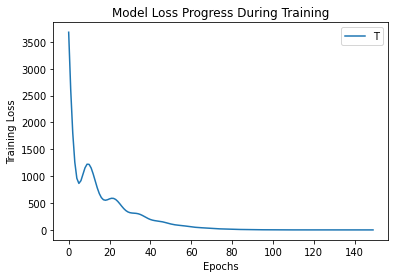

In [ ]:
plt.plot(history.history['loss'])
plt.title("Model Loss Progress During Training")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.legend("Training Loss")

In [ ]:
model.get_weights()

[array([[1.8001648]], dtype=float32), array([32.03128], dtype=float32)]

In [ ]:
def c_to_f(c):
  return 9/5 * c + 32

In [ ]:
Temp_C = [0, 15, 35] # 32, 59, 95

for c in Temp_C:
  Temp_F = model.predict([c])
  print(f'C {c} = F {Temp_F}')

C 0 = F [[32.03128]]
C 15 = F [[59.033752]]
C 35 = F [[95.03705]]


In [ ]:
for c in Temp_C:
  print(f'C {c} = F {c_to_f(c)}')

C 0 = F 32.0
C 15 = F 59.0
C 35 = F 95.0
